In [2]:
%pylab inline
import pygadgetreader

Populating the interactive namespace from numpy and matplotlib


In [284]:
## Code draft!

def circular_orbit_ids(pos, vel, ids, mass):
    G = 43007.1
    r = np.sqrt(np.sum(pos**2, axis=1))
    v = np.sqrt(np.sum(vel**2, axis=1))
    vc = np.zeros(300)
    ids_vc = np.zeros(30)
    j=0
    for i in range(1, 300, 10):
        index_in = np.where(r<i)
        M_in = np.sum(mass[index_in])
        #print(M_in)
        vc = (G*M_in / i )**0.5
        #print(vc)
        index_vc = np.argmin(np.abs(v[index_in]-vc))
        ids_vc[j] = ids[index_in][index_vc]
        j+=1
    return ids_vc


def get_particle_id(pos, vel, ids, r_lim, dr, v_lim, dv):
    r = np.sqrt(np.sum(pos**2, axis=1))
    v = np.sqrt(np.sum(vel**2, axis=1))
    index = np.where((r<r_lim+dr) & (r>r_lim-dr) & (v<v_lim+dv) & (v>v_lim-dv))
    print(len(index[0]))
    return ids[index]




def extract_orbit(snap, id_p, i):
    pos = pygadgetreader.readsnap(snap+'_{:0>3d}'.format(i), 'pos', 'dm')
    ids = pygadgetreader.readsnap(snap+'_{:0>3d}'.format(i), 'pid', 'dm')
    sorted_indices = np.argsort(ids)
    particles = np.in1d(ids[sorted_indices], np.sort(id_p))
    pos_orbit = pos[sorted_indices][particles]
    return pos_orbit

def extract_all_orbits(snap, snap_i, snap_f, ids_p):
    N_snaps = snap_f - snap_i +1 
    N_part = len(ids_p)
    pos_orbits = np.zeros((N_snaps, N_part, 3))
    j=0
    for i in range(snap_i, snap_f+1):
        pos_orbits[j] = extract_orbit(snap, ids_p, i)
        j+=1
    return pos_orbits
    
def out_orbits(out_name, snap, snap_i, snap_f, ids_p):
    N_part = len(ids_p)
    all_pos = extract_all_orbits(snap, snap_i, snap_f, ids_p)
    np.shape(all_pos)
    for i in range(N_part+1):
        np.savetxt(out_name+"_particle_{:0>3d}.txt".format(i), all_pos[:,i,:])

In [299]:
index_in = np.where(np.sqrt(np.sum(pos**2, axis=1))<400)
print(np.sum(mass[index_in]), np.sum(mass))


157.56396 185.96638


In [291]:
pygadgetreader.readheader('../data/MW2_10M_halo_vir_018', 'time')

1.7999999970197678

In [293]:
pygadgetreader.readheader('../data/MW2_10M_halo_vir_018', 'header')

{'npartThisFile': array([       0, 10000000,        0,        0,        0,        0],
       dtype=uint32),
 'npartTotal': array([       0, 10000000,        0,        0,        0,        0],
       dtype=uint32),
 'npartTotalHW': array([0, 0, 0, 0, 0, 0], dtype=uint32),
 'ngas': 0,
 'ndm': 10000000,
 'ndisk': 0,
 'nbulge': 0,
 'nstar': 0,
 'nbndry': 0,
 'massTable': array([0., 0., 0., 0., 0., 0.]),
 'time': 1.7999999970197678,
 'nfiles': 1,
 'redshift': 0.0,
 'boxsize': 50000.0,
 'O0': 0.3,
 'Ol': 0.7,
 'h': 0.7,
 'flag_cooling': 1,
 'flag_sfr': 1,
 'flag_fb': 1,
 'flag_fh2': 0,
 'flag_age': 0,
 'flag_metals': 0,
 'flag_potential': 0,
 'flag_delaytime': 0,
 'flag_tmax': 0,
 'rhocrit': 9.204287651105116e-30}

In [294]:
pos = pygadgetreader.readsnap('../data/MW2_10M_halo_vir_018', 'pos', 'dm')
vel = pygadgetreader.readsnap('../data/MW2_10M_halo_vir_018', 'vel', 'dm')
ids = pygadgetreader.readsnap('../data/MW2_10M_halo_vir_018', 'pid', 'dm')
mass = pygadgetreader.readsnap('../data/MW2_10M_halo_vir_018', 'mass', 'dm')

Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Mass


In [295]:
ids_circular_orbit = circular_orbit_ids(pos, vel, ids, mass)

In [259]:
ids2 = pygadgetreader.readsnap('../data/MW2_1_halo_vir_100', 'mass', 'dm')
pos2 = pygadgetreader.readsnap('../data/MW2_1_halo_vir_100', 'pos', 'dm')

Returning DM    Mass
Returning DM    Positions


In [296]:
ids_circular_orbit

array([1857379., 7436538., 2519951., 4050940., 3784634., 6979324.,
       1441213., 6885780., 6101421., 8901477., 1401245., 7632048.,
       4632114., 7847452., 5730188., 1311345., 1719510., 3583250.,
       7385113., 4345460., 4356963., 9218194., 3936112., 6842673.,
       3590187., 8886768., 8548252., 4101236., 7313964., 8280525.])

In [297]:
np.savetxt('ids_circular_MW2_10M_halo_vir.txt', ids_circular_orbit.astype(int))

In [218]:
index = np.where(ids==104)
print(pos[index])

index2 = np.where(ids2==104)
print(pos2[index2])

[[-43.005577 -48.91728  -27.597343]]
[[-40.297142 -49.048965 -30.518963]]


In [171]:
ids2[0:10]

array([33240,  4890,  1013,  1728, 67850,   284, 12882, 57986, 13050,
       37638], dtype=uint32)

In [107]:
ids_all = np.array([])
for i in range(1, 100, 10):
    ids_r = get_particle_id(pos, vel, ids, i, 1, 200, 2)
    #ids_all.append(ids_r.flatten())
    ids_all = np.concatenate((ids_all, ids_r))

1
27
24
18
21
23
12
28
17
21


In [123]:
out_orbits()

192

In [132]:
pos[np.in1d(ids, ids_all)]

array([[ 6.91077995e+00,  7.45415354e+00, -4.95551872e+00],
       [ 3.98493042e+01,  4.90032921e+01,  3.08582573e+01],
       [ 1.45036831e+01, -4.54635162e+01, -1.96862450e+01],
       [ 3.49508324e+01,  2.28463497e+01,  2.82686920e+01],
       [ 4.99438286e+01,  3.76207376e+00, -5.04755821e+01],
       [-4.28632402e+00, -1.61763191e+00, -9.03540993e+00],
       [ 1.27890870e-01,  5.80870962e+00, -2.01879177e+01],
       [-2.54364395e+01,  3.18352890e+01, -4.40501451e+00],
       [-2.29149342e+00, -2.02119331e+01,  7.80318308e+00],
       [-2.67386675e+00, -2.57633133e+01, -1.72689724e+01],
       [-1.52371721e+01,  4.20407534e+00, -3.78484306e+01],
       [-4.51161766e+01,  8.00950623e+00,  5.49323540e+01],
       [ 7.67454224e+01, -2.06874027e+01, -1.62375946e+01],
       [ 4.42453194e+01, -1.14000821e+00,  4.28758354e+01],
       [ 3.82569790e-01,  4.00102806e+01, -8.17152679e-01],
       [ 4.95747662e+00, -1.01731987e+01,  1.80792141e+01],
       [-2.82905750e+01, -5.42009068e+00

In [116]:
np.savetxt('ids_MW2_1_halo_vir.txt', ids_all.astype(int))

In [97]:
all_pos = extract_all_orbits('../data/MW2_1_halo_vir', 99, 100, ids_all.astype(int))

Returning DM    Positions
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Particle IDs


In [117]:
#out_orbits("orbits_MW2_1_halo_vir", '../data/MW2_1_halo_vir', 99, 100, ids_all.astype(int))

In [115]:
!less orbits_MW2_1_halo_vir_particle_002.txt

1.450368309020996094e+01 -4.546351623535156250e+01 -1.968624496459960938e+01
-5.492454528808593750e+00 1.232424068450927734e+01 1.280674171447753906e+01
(END)alo_vir_particle_002.txt (END)

In [247]:
data_nbody_all = np.zeros((192, 251, 3))
for i in range(192):
    data_nbody_all[i] = np.loadtxt('../data/nbody_orbits/orbits_MW2_1_halo_vir_particle_{:0>3d}.txt'.format(i))
    

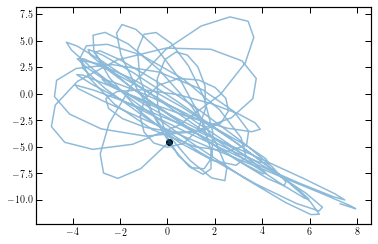

In [248]:
plot(data_nbody_all[0][:,1], data_nbody_all[0][:,2], alpha=0.5)
scatter(data_nbody_all[0][0,1], data_nbody_all[0][0,2], c='k')

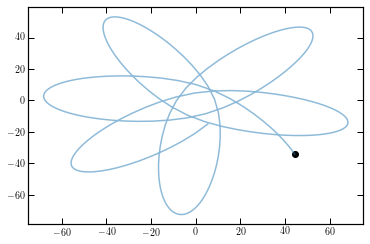

In [249]:
plot(data_nbody_all[100][:,1], data_nbody_all[100][:,2], alpha=0.5)
scatter(data_nbody_all[100][0,1], data_nbody_all[100][0,2], c='k')

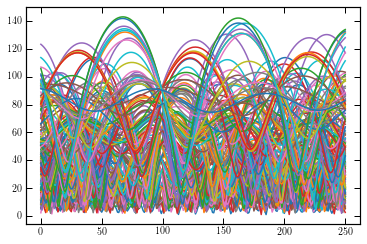

In [253]:
for i in range(191):
    plot(np.sqrt(np.sum(data_nbody_all[i]**2, axis=1)))
